# Campaign for selling personal loans:
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.<br/><br/>
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.<br/><br/>
The file Bank.xls contains data on 5000 customers. The data includes customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.<br/><br/>
Dataset: Bank_Personal_Loan_Modelling.csv<br/>
Column description: TheraBank_Column_Description.xlsx

In [1]:
import warnings;
warnings.simplefilter('ignore')
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

1. Read the column descriptions and ensure you understand each attribute well.

In [4]:
thera_bank_metadata = pd.read_excel(io='TheraBank_Column_Description.xlsx',skiprows=6,usecols='B:D')
thera_bank_metadata['Column_Name'] = thera_bank_metadata.iloc[:,0:1]
thera_bank_metadata['Column_Desc'] = thera_bank_metadata.iloc[:,1:2]
thera_bank_metadata = thera_bank_metadata.drop(columns=['Unnamed: 0','Unnamed: 1'])
pd.set_option('display.max_colwidth',100)
thera_bank_metadata

,Column_Name,Column_Desc
0,ID,Customer ID
1,Age,Customer's age in completed years
2,Experience,#years of professional experience
3,Income,Annual income of the customer ($000)
4,ZIPCode,Home Address ZIP code.
5,Family,Family size of the customer
6,CCAvg,Avg. spending on credit cards per month ($000)
7,Education,Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
8,Mortgage,Value of house mortgage if any. ($000)
9,Personal Loan,Did this customer accept the personal loan offered in the last campaign?


In [5]:
pd.set_option('display.max_colwidth',50)

2. Study the data distribution in each attribute, share your findings. (10 points)

In [6]:
thera_bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [7]:
thera_bank.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
thera_bank.shape

(5000, 14)

In [9]:
thera_bank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP_Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [10]:
thera_bank.isnull().any().any()

False

In [11]:
thera_bank.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [12]:
thera_bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [13]:
thera_bank[thera_bank.Experience<0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,52.0,2427.346154,1478.834118,90.0,767.25,2783.5,3669.500,4958.0
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIP_Code,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal_Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0


#### <u>Observasion:</u>
i. Features Education, Family, ZIP_Code, Personal_Loan[target], Securities_Account, CD_Account, Online & CreditCard must be categorical.<br/>
ii. ZipCode has an outlier '9307'. Without the outlier, the ZipCode values range from 90005 to 96651. This needs to be removed.<br/>
iii. Experience is negative in 52 records and belong to the age group of 23 - 29.<br/>Must be an error in capturing the data.<br/>These records must be cleaned up by research or removal or converting them into positive values.<br/>Since these account holders didnot respond positively to the Personal Loan campaign the last time, we can remove these records.

In [14]:
thera_bank_clean = thera_bank.drop(thera_bank[thera_bank.Experience<0].index)
thera_bank_clean = thera_bank_clean.drop(thera_bank_clean[thera_bank_clean.ZIP_Code<10000].index)
thera_bank_clean.drop(columns=['ID'],inplace=True)
thera_bank_clean.ZIP_Code = thera_bank_clean.ZIP_Code.astype('category')
thera_bank_clean.Family = thera_bank_clean.Family.astype('category')
thera_bank_clean.Education = thera_bank_clean.Education.astype('category')
thera_bank_clean.Personal_Loan = thera_bank_clean.Personal_Loan.astype('category')
thera_bank_clean.CD_Account = thera_bank_clean.CD_Account.astype('category')
thera_bank_clean.Online = thera_bank_clean.Online.astype('category')
thera_bank_clean.CreditCard = thera_bank_clean.CreditCard.astype('category')
thera_bank_clean.Securities_Account = thera_bank_clean.Securities_Account.astype('category')

In [15]:
thera_bank_clean.dtypes

Age                      int64
Experience               int64
Income                   int64
ZIP_Code              category
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
dtype: object

In [16]:
thera_bank_clean[thera_bank_clean.Experience<0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Experience,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCAvg,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
thera_bank_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4947.0,45.556095,11.321615,24.0,36.0,46.0,55.0,67.0
Experience,4947.0,20.330099,11.312922,0.0,10.5,20.0,30.0,43.0
Income,4947.0,73.825147,46.111141,8.0,39.0,64.0,98.0,224.0
CCAvg,4947.0,1.936196,1.747768,0.0,0.7,1.5,2.6,10.0
Mortgage,4947.0,56.645846,101.835994,0.0,0.0,0.0,101.0,635.0


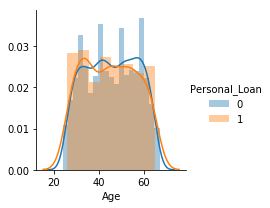

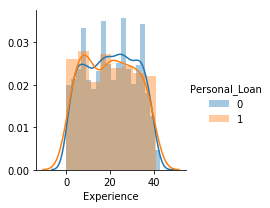

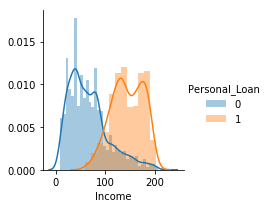

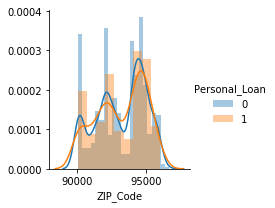

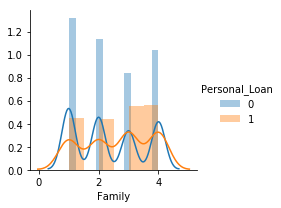

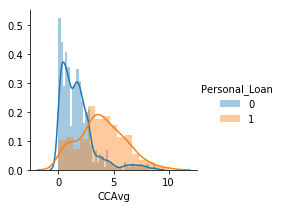

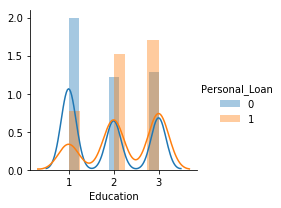

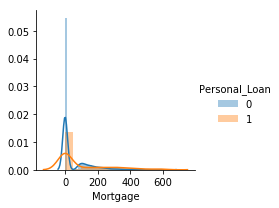

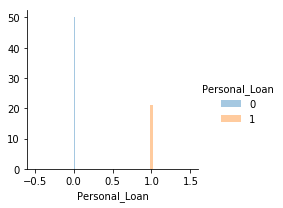

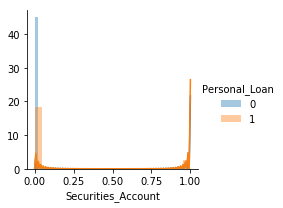

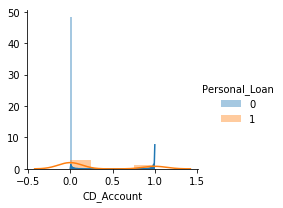

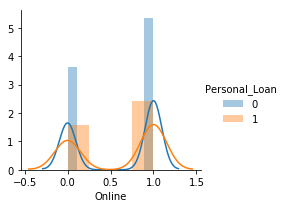

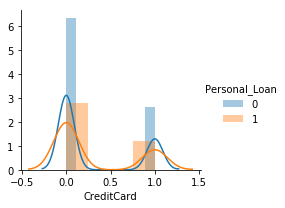

In [18]:
for i in range(0,len(thera_bank_clean.columns)):
    sb.FacetGrid(data=thera_bank_clean,hue='Personal_Loan').map(sb.distplot,thera_bank_clean.columns[i]).add_legend();

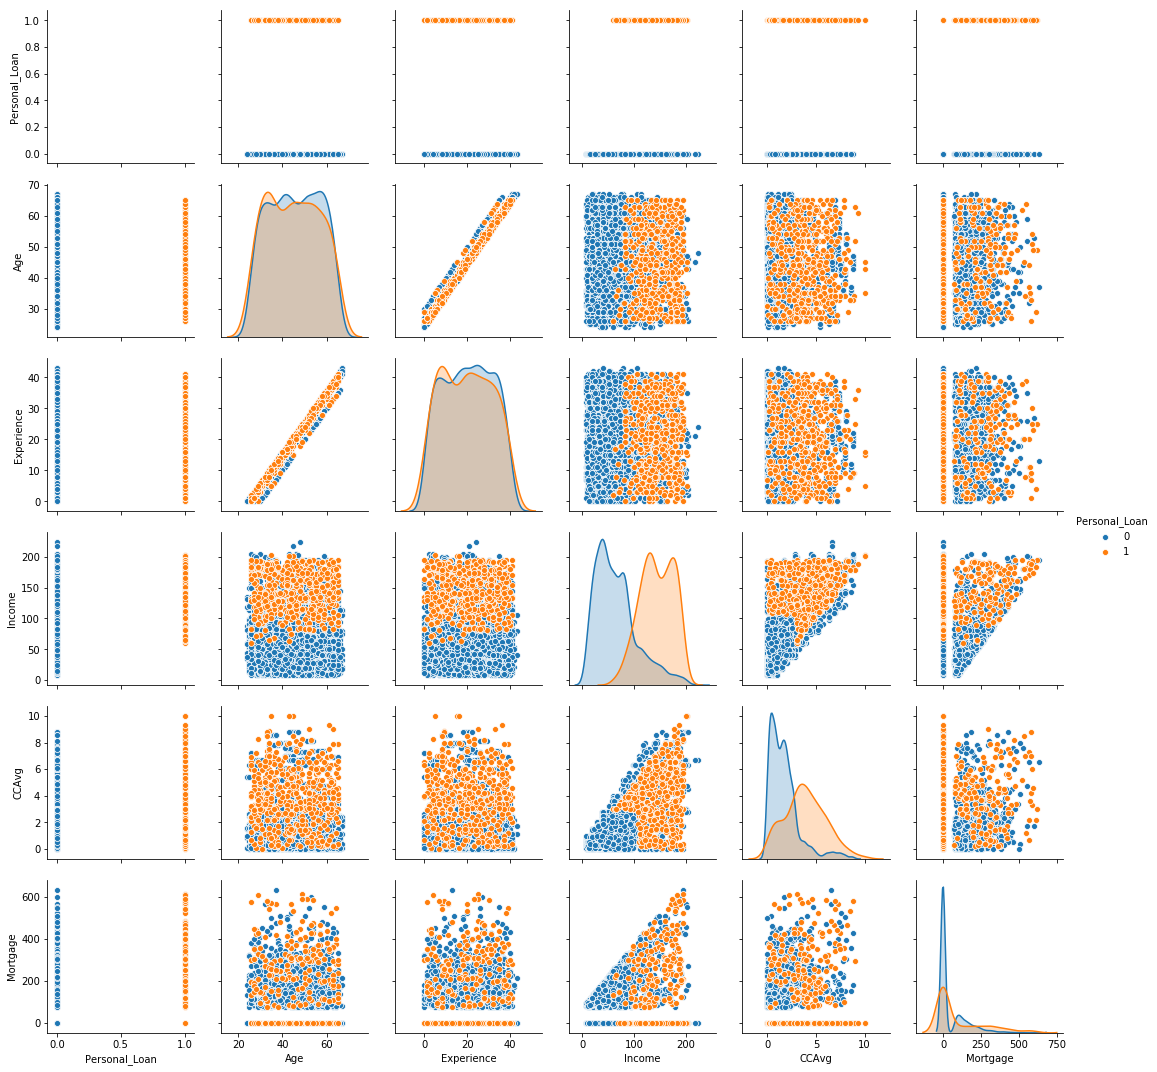

In [19]:
sb.pairplot(data=thera_bank_clean.loc[:,['Personal_Loan','Age','Experience','Income','CCAvg','Mortgage']],hue='Personal_Loan')

In [20]:
thera_bank_clean.corr()

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000000,0.994102,-0.057903,-0.050809,-0.015131
Experience,0.994102,1.000000,-0.049157,-0.048879,-0.013414
Income,-0.057903,-0.049157,1.000000,0.646125,0.206826
CCAvg,-0.050809,-0.048879,0.646125,1.000000,0.109829
Mortgage,-0.015131,-0.013414,0.206826,0.109829,1.000000


#### <u>Observations:</u><br/>
i. Age & Experience have a linear relationship.<br/>
ii. Only the continuous variables and the dependent variable are ploted above and all the continuous variables have a bi-modal or multi-modal distribution.<br/>
iii. Average Credit Card bill per month and the house morgage have a complicated relationship with Income. It appears that as the income of a person increases, the CCAvg and morgage increases. But it doesnot help resolve the relTationship with the choice of taking a Personal_Loan.<br/>
iv. The correlation values reflect the same observations.

3. Get the target column distribution. Your comments

In [21]:
thera_bank_clean.Personal_Loan.value_counts()

0    4467
1     480
Name: Personal_Loan, dtype: int64

In [22]:
thera_bank_clean.Personal_Loan.value_counts(normalize=True)*100

0    90.29715
1     9.70285
Name: Personal_Loan, dtype: float64

#### <u>Comments:</u><br/>
The people who took a personal loan in the last campaign is only 9.7% of the entire dataset

4. Split the data into training and test set in the ratio of 70:30 respectively

In [23]:
from sklearn.model_selection import train_test_split
thera_bank_clean = thera_bank_clean.reset_index(drop=True)
x = thera_bank_clean.drop(columns=['Experience','Personal_Loan'])
y = thera_bank_clean.Personal_Loan

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [25]:
print("X Train Shape:",x_train.shape)
print("X Test Shape:",x_test.shape)
print("Y Train Shape:",y_train.shape)
print("Y Test Shape:",y_test.shape)

X Train Shape: (3462, 11)
X Test Shape: (1485, 11)
Y Train Shape: (3462,)
Y Test Shape: (1485,)


5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)

6. Print the confusion matrix for all the above models (10 points)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [27]:
LogReg = LogisticRegression(random_state=0)
LogReg.fit(x_train,y_train)
y_predicted = LogReg.predict(x_test)
print('Logistic Regression Model:\nAccuracy:\n',LogReg.score(x_test,y_test))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_predicted))

Logistic Regression Model:
Accuracy:
 0.9212121212121213
Confusion Matrix:
 [[1336   32]
 [  85   32]]


In [28]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(x_train,y_train)
y_predicted = knn.predict(x_test)
print('KNN Classifier Model:\nAccuracy:\n',knn.score(x_test,y_test))
print('Confusion Matrix \n',confusion_matrix(y_test,y_predicted))

KNN Classifier Model:
Accuracy:
 0.9205387205387205
Confusion Matrix 
 [[1367    1]
 [ 117    0]]


In [29]:
NvBys = GaussianNB()
NvBys.fit(x_train,y_train)
y_predicted = NvBys.predict(x_test)
print('Naive Bayes Classifier Model:\nAccuracy:\n',NvBys.score(x_test,y_test))
print('Confusion Matrix \n',confusion_matrix(y_test,y_predicted))

Naive Bayes Classifier Model:
Accuracy:
 0.9037037037037037
Confusion Matrix 
 [[1271   97]
 [  46   71]]


7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)

#### <u>Choice of Model & Justification:</u><br/>
The Logistic Regression model has out performed the other models in accuracy.<br/>
Although the KNN Classifier model predicts the probability of liability customers taking a personal loan better than the Logistic Regression model, the facts that KNN is a lazy learner and it doesnt technically learn anything from the training dataset and only uses the training set everytime to find a neighbour everytime it must predict a new customer's p(taking personal loan), I choose logistic regression model as the best for this problem.